### Simple Linear Regression
Height-Weight Dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
## Read the dataset
df = pd.read_csv("datasets/height-weight.csv")
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


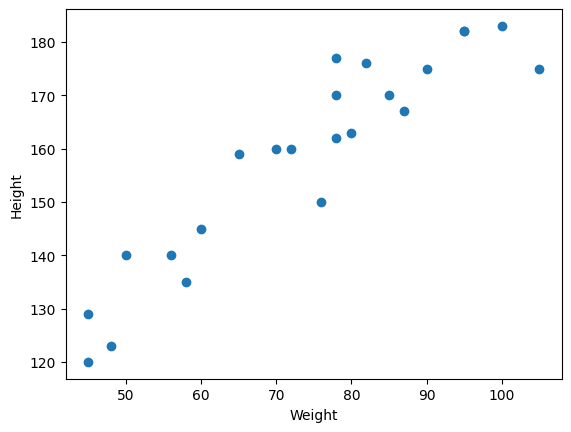

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
X = df[["Weight"]]
y = df[["Height"]]

In [6]:
### Split the dataset to training and test data
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
X.shape

(23, 1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [10]:
### standardize the training data (Independent feature only)
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

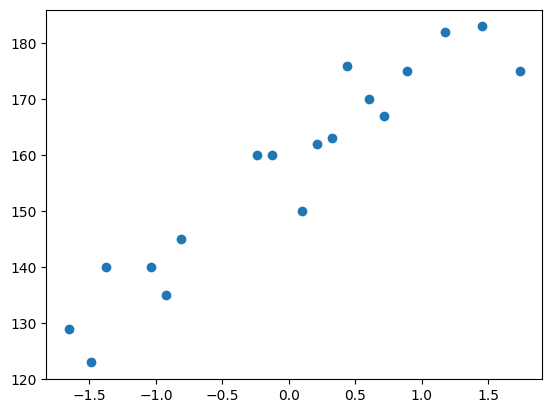

In [13]:
plt.scatter(X_train,y_train)

In [14]:
## Train the Simple Linear Regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [15]:
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
print("The coefficient of weight is: ",regressor.coef_)
print("The Intercept is: ",regressor.intercept_)

The coefficient of weight is:  [[17.03440872]]
The Intercept is:  [157.5]


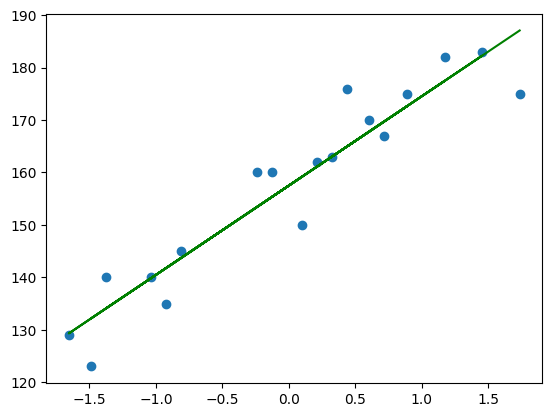

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

In [18]:
y_pred_test = regressor.predict(X_test)

In [19]:
y_pred_test, y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

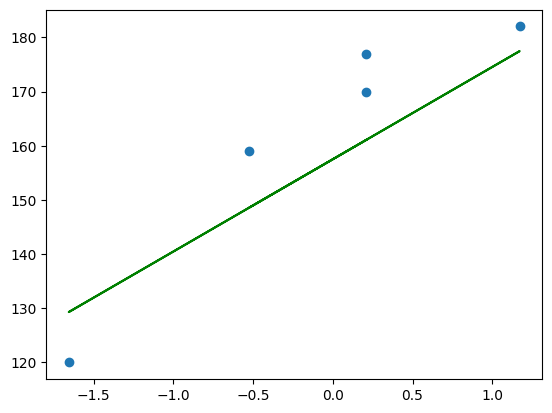

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'g')

### Performance Metrics
### MSE,MAE,RMSE
### R Squared
### Adjusted R Squared

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [22]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = root_mean_squared_error(y_test,y_pred_test)
r_squared = r2_score(y_test,y_pred_test)

print("MSE: ",round(mse,2))
print("MAE: ",round(mae,2))
print("RMSE: ",round(rmse,2))
print("R_Squared: ",round(r_squared,3))


MSE:  109.78
MAE:  9.82
RMSE:  10.48
R_Squared:  0.777


In [23]:
Adjusted_R_Squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) 
print("Adjusted R_Squared: ", round(Adjusted_R_Squared,3))

Adjusted R_Squared:  0.703


In [24]:
scaled_weight = scaler.transform([[80]])
scaled_weight

d:\Data_Science\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [25]:
regressor.predict([scaled_weight[0]])

array([[163.01076266]])

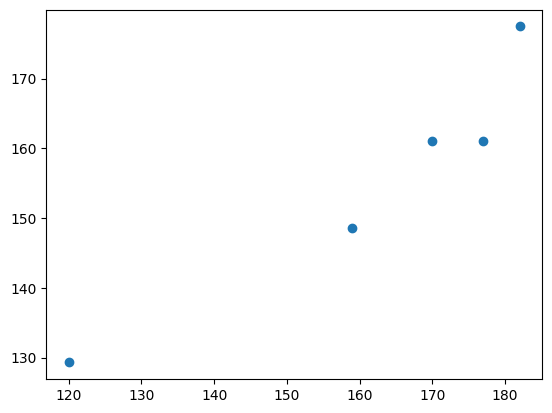

In [26]:
plt.scatter(y_test,y_pred_test)

In [27]:
residuals = y_test - y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


C:\Users\User\AppData\Local\Temp\ipykernel_44484\3762910054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

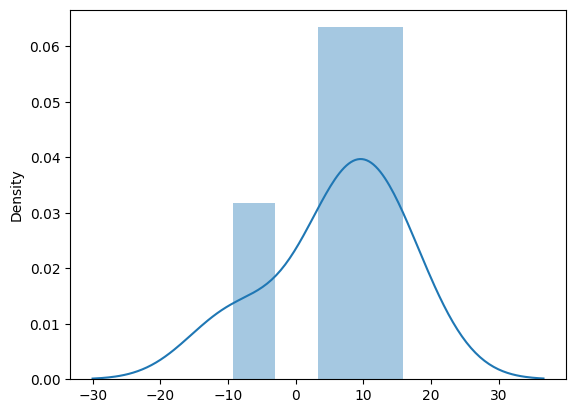

In [28]:
sns.distplot(residuals,kde=True)